In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gap_statistic import OptimalK
try:
    from sklearn.datasets.samples_generator import make_blobs
except ImportError:
    from sklearn.datasets import make_blobs
import os
import xlrd
import math

In [2]:
root = os.getcwd()

In [3]:
g_path = os.path.join(root, 'vis_28.csv')
g_df_28 = pd.read_csv(g_path)

i=0
t2wp_df = pd.DataFrame()
p2t_df = pd.DataFrame()
s2p_df = pd.DataFrame()

tasks = []
spatials = []
p_nodes = []
packages = []

for row in g_df_28.iterrows():
    temp_vals = list(row[-1].values)
    
    packages.append(temp_vals[0])
    tasks.append(temp_vals[1])
    spatials.append(temp_vals[2].replace('sp-', ''))
    
    p_nodes.append( list(set([d for d in temp_vals[3:] if (type(d)==str)])) )
    len_ = len(p_nodes[i])
    wp_nodes = list(np.repeat(temp_vals[0], len_))  # package
    t_nodes = list(np.repeat(temp_vals[1], len_))  # task
    sp_nodes = list(np.repeat(temp_vals[2].replace('sp-', ''), len_))# spatial
    
    temp_df = pd.DataFrame({ 'package':wp_nodes, 'task':t_nodes, 'product':p_nodes[i], 'spatial':sp_nodes })
    #print(temp_df)
    
    temp_t2wp_df = temp_df.iloc[:, 0:2]
    t2wp_df = pd.concat([t2wp_df, temp_t2wp_df], axis=0)
    
    temp_p2t_df = temp_df.iloc[:, 1:3]
    p2t_df = pd.concat([p2t_df, temp_p2t_df], axis=0)
    
    temp_s2p_df = temp_df.iloc[:, 2:4]
    s2p_df = pd.concat([s2p_df, temp_s2p_df], axis=0)
    
    i+=1

# save node dfs
node_df = pd.DataFrame(columns=['node', 'type'])
node_df = pd.concat([node_df, pd.DataFrame({'node':list(set(tasks)), 'type':'task'})])
node_df = pd.concat([node_df, pd.DataFrame({'node':list(set(spatials)), 'type':'spatial'})])
node_df = pd.concat([node_df, pd.DataFrame({'node':list(set(packages)), 'type':'package'})])
for pro in p_nodes:
    node_df = pd.concat([node_df, pd.DataFrame({'node':pro, 'type':'product'})])

node_df.to_csv(os.path.join(root, ('vis_dfs/node.csv')), index=False)
    
# save relation dfs
t2wp_df.to_csv(os.path.join(root, ('vis_dfs/t2wp.csv')), index=False)
p2t_df.to_csv(os.path.join(root, ('vis_dfs/p2t.csv')), index=False)
s2p_df.to_csv(os.path.join(root, ('vis_dfs/s2p.csv')), index=False)


In [4]:
sc_pth = os.path.join(root, 'sc_data.csv')
sc_df = pd.read_csv(sc_pth, header=None)

print(sc_df)

       0      1                        2
0  0.217  0.167        task name feature
1  0.297  0.181          product feature
2  0.319  0.323  work dependency feature
3  0.334  0.341          spatial feature


In [5]:
m_data = list(sc_df[0].values)
d_data = list(sc_df[1].values)
tags = list(sc_df[2].values)


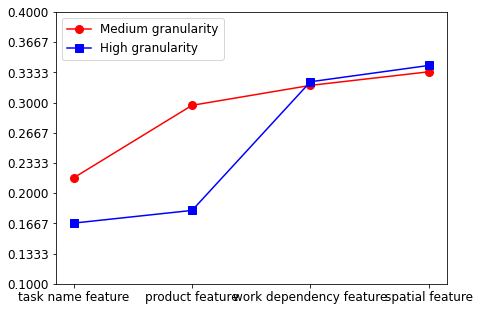

In [8]:
fig = plt.figure(figsize = (7,5))
ax = fig.add_subplot(1, 1, 1)

plt.plot(tags, m_data, c='red', label='Medium granularity', linewidth=1.5, marker='o', markerfacecolor='red', markersize=8)
plt.plot(tags, d_data, c='blue', label='High granularity', linewidth=1.5, marker='s', markerfacecolor='blue', markersize=8)

plt.legend(fontsize=12, loc='upper left')
plt.xticks(tags, rotation=0, size=12)
plt.yticks(np.linspace(0.1, 0.4, 10), rotation=0, size=12)
    
plt.savefig(os.path.join(root, 'sc.png'), dpi=300)
plt.show()
         

In [29]:
root = os.getcwd()
#data_pth = os.path.join(root, 'task2vec_23.csv')
data_pth = os.path.join(root, 'task2vec_28.csv')
data_work_df = pd.read_csv(data_pth, header=0, dtype={'PRE':str,'SUC':str,'PAR':str})
data_work_df

,ID,PRE-1,WP,Task detail,PRE,SUC,PAR,SP,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,0,NaN,0,Board pretreatment and punching,-1,1,-1,sp-none,Lysaght Bondek,Gemtree FRP Board,...,Gypsum Board,Cement Board,Knauf FRP Board,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,1,2D panel assembly,0,3,2,sp-plane,Corrugated profile,Composite floor slab,...,Composite floor slab,Shear stud,Corrugated profile,Composite floor slab,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,1,Butt weld and fillet weld,0,3,1,sp-none,metal pencil,Welding Electrode,...,Welding Electrode,Electrode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,2,3D assembly,"1,2",4,-1,sp-room space,Steel ceiling beam,Steel Purlins,...,Steel floor beam,Corner Casting,Steel Angle,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,2,Apply fire paint at strucutral member,3,5,-1,sp-room space,Fire protection paint,Firecut FM-900 paint,...,Firecut FM-900 paint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,NaN,3,Rebar Fixing,4,6,-1,sp-none,Reinforcement Bar,Bar Chair,...,Steel Reinforcement Bar,Rebar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,NaN,3,Pouring Concrete,5,7,-1,sp-none,Non-shrink Grout,Concrete,...,Concrete,Concrete mixture,Concrete,Concrete mixture,Concrete addings,Concrete,NaN,NaN,NaN,NaN
7,7,NaN,4,Door ironmongery installation,6,11,"8,9,10",sp-door interface,Door Ironmongery,Hinge,...,Latches,FRP Timber Door,Non-FRP Timber Door,Timber Door,NaN,NaN,NaN,NaN,NaN,NaN
8,8,NaN,4,Window ironmongery installation,6,11,"7,9,10",sp-window interface,Aluminium Window,Hinge,...,Latches,Glass Panel,Aluminium Window,Hinge,Handle,Latches,Glass Panel,NaN,NaN,NaN
9,9,NaN,4,Door frame installation,6,11,"7,8,10",sp-door interface,Acoustic Insulation,Overhead Door Closer,...,Acoustic Insulation,Acoustic Insulation,Overhead Door Closer,Aluminium Cladding,Door threshold,Rockwool Acoustic Insulation,Door Frame,Hardwood Solid Core Flush Doors,NaN,NaN


In [24]:
a = 1
[a]

[1]

In [39]:
# generate sp_triples
cluster_dic = {}
for i, row in data_work_df.iterrows():
    res_row_prodcuts = []
    row_products = [b.lower() for b in [a for a in row.values if pd.isna(a)==False][8:] if  not 'contains' in b]
    
#     print(row['PRE'], type(row['PRE']))
#     print(row['SUC'], type(row['SUC']))
#     print(row['PAR'], type(row['PAR']))
    pre_lst = [-1 if '-' in a else int(a) for a in  row['PRE'].strip().split(',') ]
    suc_lst = [-1 if '-' in a else int(a) for a in  row['SUC'].strip().split(',') ]
    par_lst = [-1 if '-' in a else int(a) for a in  row['PAR'].strip().split(',') ]
#     print(pre_lst)
#     print(suc_lst)
#     print(par_lst)
    
    deps = [np.mean( pre_lst ), np.mean( suc_lst ), np.mean( par_lst )]
    deps = [str(a) for a in deps]
    print(deps)
    t_name = row['Task detail'].strip().lower()
    row_sp = row['SP'].split(';')
    row_sp = [a.replace('sp-', '') for a in row_sp]
    
    for product in row_products:
        if not 'contains' in product:
            if isinstance(row_sp, list):
                for sp in row_sp:
                    res_row_prodcuts.append(sp + ' contains ' + product)
            else:
                res_row_prodcuts.append(row_sp + ' contains ' + product)
    res_row_prodcuts.extend(row_products)
    res_row_prodcuts = list(set(res_row_prodcuts))
    res_row_prodcuts.extend(deps)
    cluster_dic.update({t_name : res_row_prodcuts})
    

['-1.0', '1.0', '-1.0']
['0.0', '3.0', '2.0']
['0.0', '3.0', '1.0']
['1.5', '4.0', '-1.0']
['3.0', '5.0', '-1.0']
['4.0', '6.0', '-1.0']
['5.0', '7.0', '-1.0']
['6.0', '11.0', '9.0']
['6.0', '11.0', '8.666666666666666']
['6.0', '11.0', '8.333333333333334']
['6.0', '11.0', '8.0']
['8.5', '12.0', '-1.0']
['11.0', '13.0', '-1.0']
['12.0', '14.0', '-1.0']
['13.0', '16.0', '15.0']
['13.0', '16.0', '14.0']
['14.5', '17.0', '-1.0']
['16.0', '19.0', '18.0']
['16.0', '19.0', '17.0']
['17.5', '21.0', '20.0']
['17.5', '21.0', '19.0']
['20.0', '22.0', '-1.0']
['21.0', '23.0', '-1.0']
['22.0', '24.0', '-1.0']
['23.0', '25.0', '-1.0']
['24.0', '26.0', '-1.0']
['25.0', '27.0', '-1.0']
['26.0', '-1.0', '-1.0']


In [40]:
cluster_dic

{'board pretreatment and punching': ['none contains knauf frp board',
  'lysaght bondek',
  'none contains lysaght bondek',
  'none contains gemtree frp board',
  'cement board',
  'none contains promatect hboard',
  'gypsum board',
  'none contains gypsum board',
  'knauf frp board',
  'gemtree frp board',
  'promatect hboard',
  'none contains cement board',
  '-1.0',
  '1.0',
  '-1.0'],
 '2d panel assembly': ['shear stud',
  'plane contains composite floor slab',
  'composite floor slab',
  'plane contains corrugated profile',
  'plane contains shear stud',
  'corrugated profile',
  '0.0',
  '3.0',
  '2.0'],
 'butt weld and fillet weld': ['none contains electrode',
  'electrode',
  'welding electrode',
  'none contains metal pencil',
  'metal pencil',
  'none contains welding rod',
  'welding rod',
  'none contains welding electrode',
  '0.0',
  '3.0',
  '1.0'],
 '3d assembly': ['steel purlins',
  'room space contains corner casting',
  'room space contains steel floor beam',
  'ste

In [41]:
out_pth = os.path.join(root, 'cluster_detail.txt') # cluster.txt  cluster_detail.txt
with open(out_pth, mode='w') as f:
    for k, v in cluster_dic.items():
        f.write(k + '--')
        temp_line = ','.join(v)
        f.write(temp_line)
        f.write('\n')